In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
names1880 = pd.read_csv(r'D:\jupyter notebook\Babynames\yob1880.txt',names=['name','sex','Name_Number'])
names1880

,name,sex,Name_Number
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
5,Margaret,F,1578
6,Ida,F,1472
7,Alice,F,1414
8,Bertha,F,1320
9,Sarah,F,1288


In [7]:
names1880.groupby('sex').Name_Number.sum() ## Groupby command?

sex
F     90993
M    110493
Name: Name_Number, dtype: int64

In [9]:
####### For Concatenate all the years file  ###############3
years = range(1880, 2011)
pieces = []
columns = ['name', 'sex', 'Name_Number']

for year in years:
    
    path = 'D:\jupyter notebook/babynames/yob%d.txt' % year 
    frame = pd.read_csv(path, names=columns)

    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True) ## Concat command?

In [10]:
names

,name,sex,Name_Number,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
5,Margaret,F,1578,1880
6,Ida,F,1472,1880
7,Alice,F,1414,1880
8,Bertha,F,1320,1880
9,Sarah,F,1288,1880


In [11]:
total_births = names.pivot_table('Name_Number', index='year',columns='sex', aggfunc=sum)
total_births.tail()  ##  pivot_table ?

sex,F,M
year,,
2006,1896468,2050234
2007,1916888,2069242
2008,1883645,2032310
2009,1827643,1973359
2010,1759010,1898382


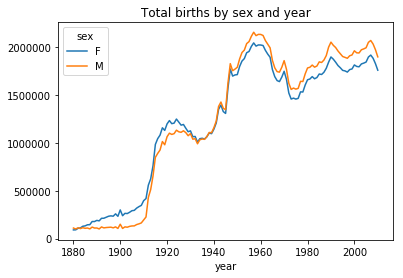

In [12]:
total_births.plot(title='Total births by sex and year')##

Next, let’s insert a column prop with the fraction of babies given each name relative to the total number of births. A prop value of 0.02 would indicate that 2 out of every 100 babies were given a particular name. Thus, we group the data by year and sex,then add the new column to each group:

In [13]:
def add_prop(x):
    x['prop'] = x.Name_Number / x.Name_Number.sum()
    return x
names = names.groupby(['year', 'sex']).apply(add_prop)
## per% gives no. names use in year

In [14]:
names

,name,sex,Name_Number,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


In [15]:
#Sanity check
names.groupby(['year', 'sex']).prop.sum()

year  sex
1880  F      1.0
      M      1.0
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
      M      1.0
1884  F      1.0
      M      1.0
1885  F      1.0
      M      1.0
1886  F      1.0
      M      1.0
1887  F      1.0
      M      1.0
1888  F      1.0
      M      1.0
1889  F      1.0
      M      1.0
1890  F      1.0
      M      1.0
1891  F      1.0
      M      1.0
1892  F      1.0
      M      1.0
1893  F      1.0
      M      1.0
1894  F      1.0
      M      1.0
            ... 
1996  F      1.0
      M      1.0
1997  F      1.0
      M      1.0
1998  F      1.0
      M      1.0
1999  F      1.0
      M      1.0
2000  F      1.0
      M      1.0
2001  F      1.0
      M      1.0
2002  F      1.0
      M      1.0
2003  F      1.0
      M      1.0
2004  F      1.0
      M      1.0
2005  F      1.0
      M      1.0
2006  F      1.0
      M      1.0
2007  F      1.0
      M      1.0
2008  F      1.0
      M      1.0
2009  F      1.0
    

Extract a subset of the data to facilitate further analysis: the top 1,000 names for each sex/year combination. This is yet another group operation:

In [16]:
def get_top1000(group):
    return group.sort_values(by='Name_Number', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
# Drop the group index, not needed
top1000.reset_index(inplace=True, drop=True)

In [17]:
top1000

,name,sex,Name_Number,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


# Analysing Naming Trends
Splitting the Top 1,000 names into the boy and girl portions is easy to do first:

In [19]:
boys = top1000[top1000['sex'] == 'M'] ## or boys = top1000[top1000.sex == 'M']
girls = top1000[top1000['sex'] == 'F']

In [20]:
boys

,name,sex,Name_Number,year,prop
942,John,M,9655,1880,0.087381
943,William,M,9533,1880,0.086277
944,James,M,5927,1880,0.053641
945,Charles,M,5348,1880,0.048401
946,George,M,5126,1880,0.046392
947,Frank,M,3242,1880,0.029341
948,Joseph,M,2632,1880,0.023821
949,Thomas,M,2534,1880,0.022934
950,Henry,M,2444,1880,0.022119
951,Robert,M,2416,1880,0.021866


In [21]:
girls

,name,sex,Name_Number,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
5,Margaret,F,1578,1880,0.017342
6,Ida,F,1472,1880,0.016177
7,Alice,F,1414,1880,0.015540
8,Bertha,F,1320,1880,0.014507
9,Sarah,F,1288,1880,0.014155


Forming a pivot table of the total number of births by year and name:

In [22]:
total_births = top1000.pivot_table('Name_Number', index='year',
                                   columns='name',
                                   aggfunc=sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
1885,NaN,NaN,NaN,88.0,NaN,6.0,NaN,NaN,NaN,88.0,...,6.0,27.0,NaN,NaN,12.0,6.0,14.0,48.0,38.0,NaN
1886,NaN,NaN,NaN,86.0,NaN,NaN,NaN,NaN,NaN,84.0,...,13.0,25.0,NaN,NaN,8.0,NaN,20.0,52.0,43.0,NaN
1887,NaN,NaN,NaN,78.0,NaN,NaN,NaN,NaN,NaN,104.0,...,9.0,34.0,NaN,NaN,23.0,NaN,28.0,46.0,33.0,NaN
1888,NaN,NaN,NaN,90.0,NaN,NaN,NaN,NaN,NaN,137.0,...,11.0,42.0,NaN,NaN,23.0,7.0,30.0,42.0,45.0,NaN


In [23]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


This can be plotted for a handful of names with DataFrame’s plot method

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001CD8498C6D8>,
      dtype=object)

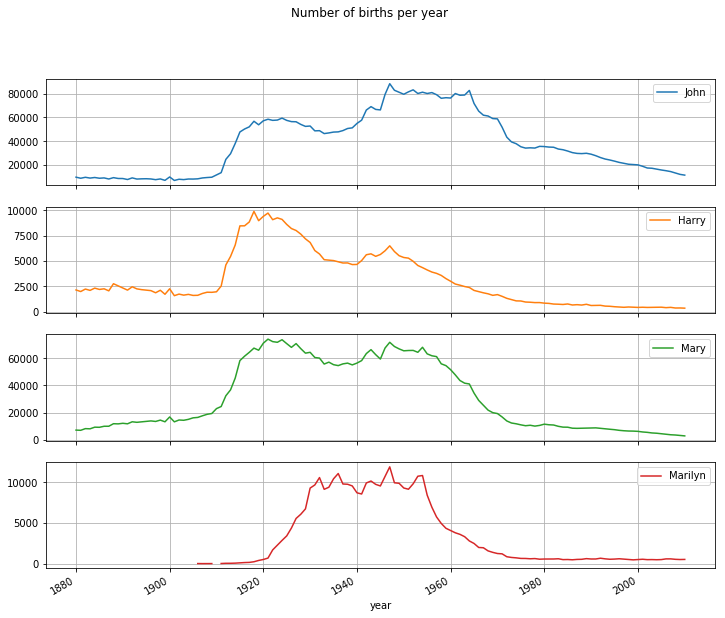

In [24]:
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=True,title="Number of births per year")   ## grid=False
## Subplot ?

# Measuring the increase in naming diversity
One explanation for the decrease in plots is that fewer parents are choosing common names for their children. This hypothesis can be explored and confirmed in the data.One measure is the proportion of births represented by the top 1,000 most popular names, which are aggregated and ploted by year and sex as given below:

<Figure size 432x288 with 0 Axes>

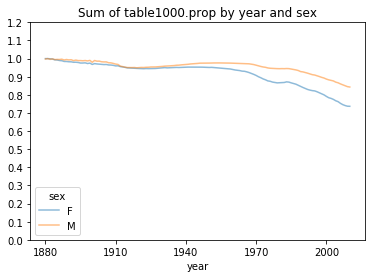

In [25]:
plt.figure()
table = top1000.pivot_table('prop', index='year',
                            columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 30),alpha=0.5)

Indeed, there appears to be increasing name diversity (decreasing total proportion in the top 1,000). Another interesting metric is the number of distinct names, taken in order of popularity from highest to lowest, in the top 50% of births. This number is a bit more tricky to compute. Let’s consider just the boy names from 2010:

In [26]:
df = boys[boys.year == 2010]
df

,name,sex,Name_Number,year,prop
260877,Jacob,M,21875,2010,0.011523
260878,Ethan,M,17866,2010,0.009411
260879,Michael,M,17133,2010,0.009025
260880,Jayden,M,17030,2010,0.008971
260881,William,M,16870,2010,0.008887
260882,Alexander,M,16634,2010,0.008762
260883,Noah,M,16281,2010,0.008576
260884,Daniel,M,15679,2010,0.008259
260885,Aiden,M,15403,2010,0.008114
260886,Anthony,M,15364,2010,0.008093


After sorting prop in descending order, we want to know how many of the most popular names it takes to reach 50%. You could write a for loop to do this, but a vectorized NumPy way is a bit more clever. Taking the cumulative sum, cumsum, of prop and then calling the method searchsorted returns the position in the cumulative sum at which 0.5 would need to be inserted to keep it in sorted order:

In [27]:
prop_cumsum = df.sort_values(by='prop', ascending=False).prop.cumsum()
prop_cumsum[:10]

260877    0.011523
260878    0.020934
260879    0.029959
260880    0.038930
260881    0.047817
260882    0.056579
260883    0.065155
260884    0.073414
260885    0.081528
260886    0.089621
Name: prop, dtype: float64

In [28]:
prop_cumsum.values.searchsorted(0.5)

116

Since arrays are zero-indexed, adding 1 to this result gives you a result of 117. By contrast, in 1900 this number was much smaller:

In [29]:
df = boys[boys.year == 1900]
in1900 = df.sort_values(by='prop', ascending=False).prop.cumsum()
in1900.values.searchsorted(0.5) + 1

25

We can now apply this operation to each year/sex combination, groupby those fields, and apply a function returning the count for each group:

In [30]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

In [31]:
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')

In [32]:
diversity.head()

sex,F,M
year,,
1880,38,14
1881,38,14
1882,38,15
1883,39,15
1884,39,16


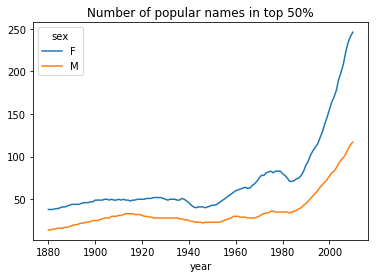

In [33]:
diversity.head()
diversity.plot(title="Number of popular names in top 50%")

# Boy names that became girl names (and vice versa)
Another fun trend is looking at boy names that were more popular with one sex earlier in the sample but have “changed sexes” in the present. One example is the name Lesley or Leslie. Going back to the top1000 DataFrame, I compute a list of names occurring in the dataset starting with “lesl”:

In [34]:
all_names = pd.Series(top1000.name.unique())
lesley_like = all_names[all_names.str.lower().str.contains('lesl')]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

From there, we can filter down to just those names and sum births grouped by name to see the relative frequencies:

In [35]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').Name_Number.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: Name_Number, dtype: int64

Next, let’s aggregate by sex and year and normalize within year:

In [37]:
table = filtered.pivot_table('Name_Number', index='year',
                             columns='sex', aggfunc='sum')
table.head()

sex,F,M
year,,
1880,8.0,79.0
1881,11.0,92.0
1882,9.0,128.0
1883,7.0,125.0
1884,15.0,125.0


In [38]:
table = table.div(table.sum(1), axis=0)## Normalization
table.head()

sex,F,M
year,,
1880,0.091954,0.908046
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857


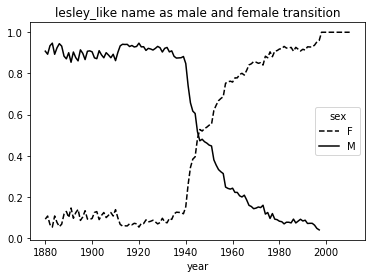

In [39]:
table.plot(title="lesley_like name as male and female transition",style={'M': 'k-', 'F': 'k--'})